In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [31]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(Measurement.date)).scalar()
latest_date

'2017-08-23'

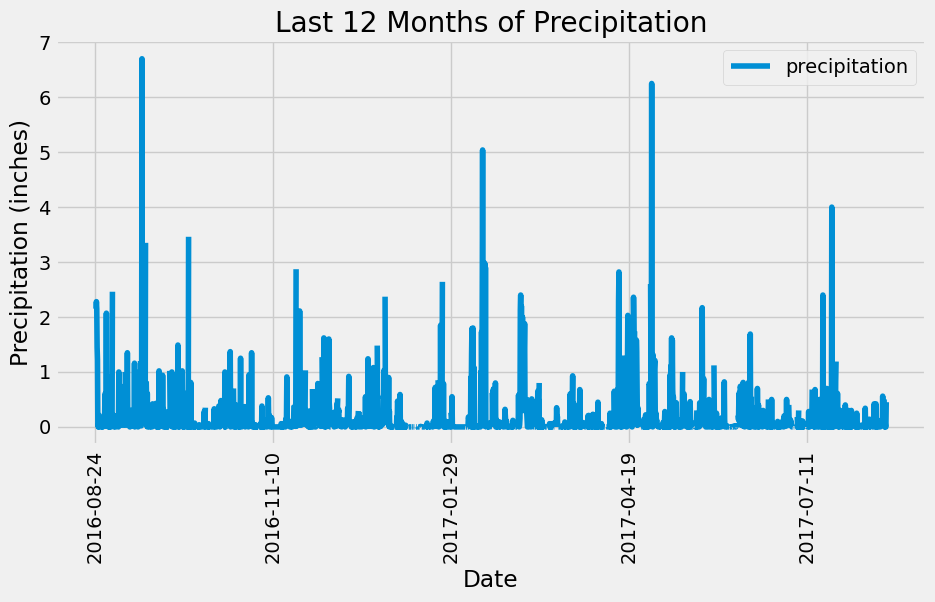

In [36]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# # Starting from the most recent data point in the database. 


# # Calculate the date one year from the last date in data set.
# one_year_ago = dt.datetime.strptime(latest_date, "%Y-%m-%d") - dt.timedelta(days=365)


# # Perform a query to retrieve the data and precipitation scores
# precip_data = session.query(Measurement.date, Measurement.prcp).\
#     filter(Measurement.date >= one_year_ago).all()

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
# df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# # Sort the dataframe by date
# precip_df = pd.DataFrame(precip_data, columns=["date", "precipitation"])
# precip_df = precip_df.sort_values("date")

# # Use Pandas Plotting with Matplotlib to plot the data
# plt.figure(figsize=(10, 5))
# plt.bar(df['date'], df['precipitation'])
# plt.title('Precipitation in the Last 12 Months')
# plt.xlabel('Date')
# plt.ylabel('Inches')
# plt.show()
# Convert latest_date to datetime and calculate one year back
one_year_ago = dt.datetime.strptime(latest_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Query last 12 months of precipitation data
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Convert to DataFrame
precip_df = pd.DataFrame(precip_data, columns=["date", "precipitation"])
precip_df = precip_df.sort_values("date")

# Set the index to the date column
precip_df.set_index("date", inplace=True)

precip_df.plot(figsize=(10,5), rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Last 12 Months of Precipitation")
plt.show()

In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(Station.station)).scalar()
num_stations


9

In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

temp_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs) 
    
).filter(Measurement.station == most_active_station).all()

temp_stats

[(54.0, 85.0, 71.66378066378067)]

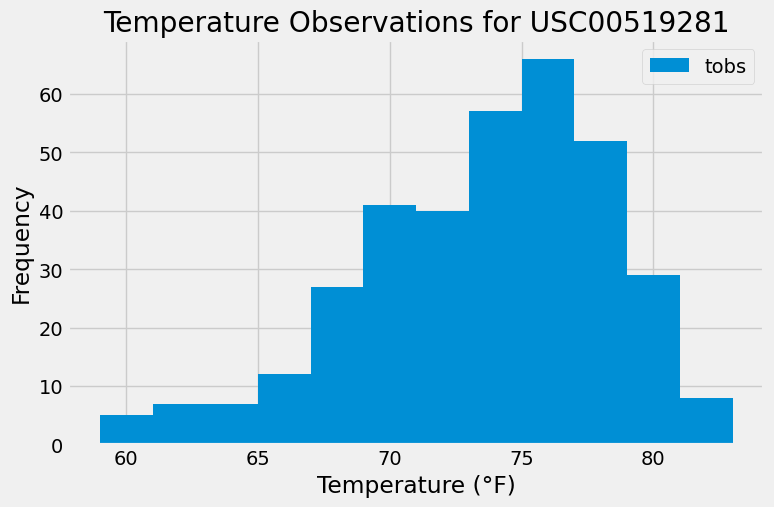

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

tobs_df = pd.DataFrame(tobs_data, columns=["tobs"])

#Plot histogram
tobs_df.plot(kind="hist", bins=12, figsize=(8,5))
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title(f"Temperature Observations for {most_active_station}")
plt.show()

# Close Session

In [48]:
# Close Session
session.close()